# **交通信息检测与处理作业1**
### 1950097 阙成恩

In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [148]:
df = pd.read_csv('Detector_sample_update.csv')


## 1)总记录数如下
----

In [149]:
df.count()

FSTR_LOOPGROUPID    4327
FDT_TIME            4327
FINT_VOLUME         4323
FINT_SPEED          4327
FINT_OCCUPY         4327
dtype: int64

## 2)检查三列的缺失数，发现流量列有四个缺失值
----

In [150]:
(df['FINT_VOLUME'].isnull().sum(),
df['FINT_SPEED'].isnull().sum(),
df['FINT_OCCUPY'].isnull().sum())

(4, 0, 0)

## 3)剔除含有缺失值的行，确认没有缺失值后，查看记录数
----

In [151]:
df.dropna(how='any',axis=0, inplace=True)
df.count()

FSTR_LOOPGROUPID    4323
FDT_TIME            4323
FINT_VOLUME         4323
FINT_SPEED          4323
FINT_OCCUPY         4323
dtype: int64

## 4)统计冗余记录数，并删除冗余记录
----

In [152]:
df.duplicated().sum()

6

In [153]:
df.drop_duplicates(inplace=True)

## 5)查看记录情况，输出基本统计值
----

In [154]:
df.describe()

,FINT_VOLUME,FINT_SPEED,FINT_OCCUPY
count,4317.000000,4317.000000,4317.000000
mean,7.509845,51.226778,15.789669
std,3.971715,18.664909,11.153003
min,0.000000,0.000000,0.000000
25%,4.000000,38.000000,5.000000
50%,9.000000,48.000000,16.000000
75%,11.000000,66.000000,25.000000
max,16.000000,107.000000,100.000000


## 6)按日期时间排序
----

In [155]:
df['time'] = np.array(pd.to_datetime(df['FDT_TIME']))
df.sort_values(by='time', inplace=True)


## 7)提取小时，分钟，秒并对应创建新列
----

In [156]:
df['HOUR'] = [a.hour for a in df['time']]
df['MINUTE'] = [a.minute for a in df['time']]
df['SECOND'] = [a.second for a in df['time']]

## 8)绘制流量速度占有率的直方图
----

Text(0.5, 1.0, 'Volume')

<Figure size 1200x800 with 0 Axes>

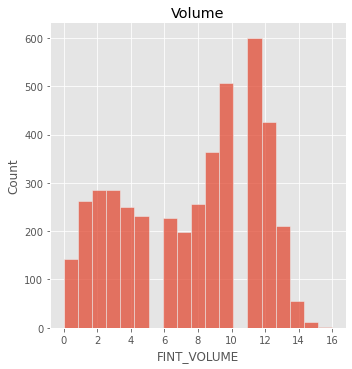

In [157]:
plt.style.use('ggplot')
plt.figure(dpi=200)
sns.displot(data=df.FINT_VOLUME)
plt.title('Volume')

Text(0.5, 1.0, 'Speed')

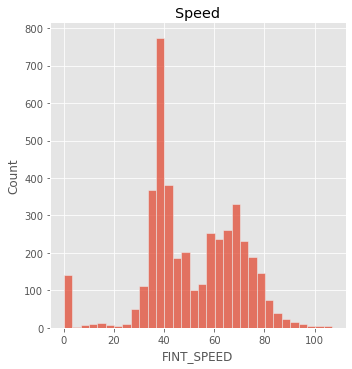

In [158]:
sns.displot(data=df.FINT_SPEED)
plt.title('Speed')

Text(0.5, 1.0, 'Occupy')

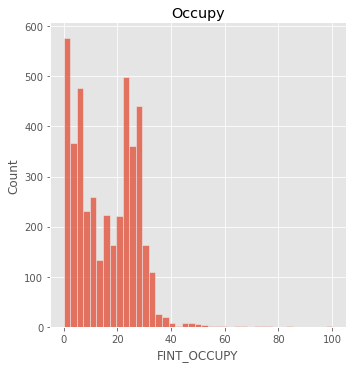

In [159]:
sns.displot(data=df.FINT_OCCUPY)
plt.title('Occupy')

## 9)绘制流量速度散点图，顺便进行了3次曲线拟合绘图
----

Text(0.5, 1.0, 'Occupy-Speed Scatter')

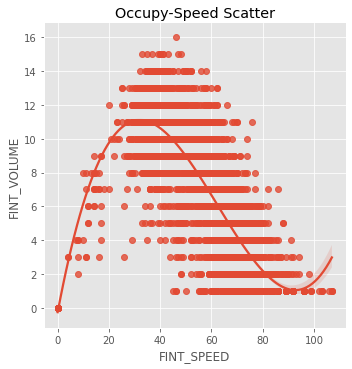

In [160]:
sns.lmplot(data=df, x='FINT_SPEED', y='FINT_VOLUME', order=3)
plt.title('Occupy-Speed Scatter')